In [1]:
# Importing requires libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import keras

In [3]:
import os

train_dir = "Datasets/train"  # Update this if the path is different
if not os.path.exists(train_dir):
    print(f"Directory '{train_dir}' not found!")
else:
    print(f"Directory '{train_dir}' exists!")


Directory 'Datasets/train' exists!


In [4]:
# Image Preprocessing using keras library
training_set = tf.keras.utils.image_dataset_from_directory(
    'Datasets/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 84490 files belonging to 51 classes.


In [5]:
print(training_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [6]:
# Validation Image Preprocessing using keras library
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Datasets/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 20674 files belonging to 51 classes.


In [7]:
print(validation_set.class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [8]:
plants = []
NumberOfDiseases = 0
for plant in training_set.class_names:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [9]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato', 'Wheat', 'rice']


In [10]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of plants: 16
Number of diseases: 38


In [11]:
# Number of images for each disease
nums = {}
for disease in training_set.class_names:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple___Apple_scab                                           2016
Apple___Black_rot                                            1987
Apple___Cedar_apple_rust                                     1760
Apple___healthy                                              2008
Blueberry___healthy                                          1816
Cherry_(including_sour)___Powdery_mildew                     1683
Cherry_(including_sour)___healthy                            1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot            390
Corn_(maize)___Common_rust_                                  1907
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___healthy                                       1859
Grape___Black_rot                                            1888
Grape___Esca_(Black_Measles)                                 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Grape___healthy                                              1692
Orange___Haunglongbing_(Citrus_greening)                     2010
Peach___Bacterial_spot                                       1838
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Pepper,_bell___healthy                                       1988
Potato___Early_blight                                        1939
Potato___Late_blight                                         1939
Potato___healthy                                             1824
Raspberry___healthy                                          1781
Soybean___healthy                                            2022
Squash___Powdery_mildew                                      1736
Strawberry___Leaf_scorch                                     1774
Strawberry___healthy                                         1824
Tomato___Bacterial_spot                                      1702
Tomato___Early_blight                                        1920
Tomato___Late_blight                                         1851
Tomato___Leaf_Mold                                           1882
Tomato___Septoria_leaf_spot                                  1745
Tomato___Spider_mites Two-spotted_spider_mite                1339
Tomato___Target_Spot                                         1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Tomato___Tomato_mosaic_virus                                 1790
Tomato___healthy                                             1926
Wheat___Brown_rust                                            902
Wheat___Healthy                                              1116
Wheat___Yellow_rust                                           924
rice___bacterial_leaf_blight                                 1231
rice___brown_spot                                            1302
rice___healthy                                               1317
rice___hispa                                                 1180
rice___leaf_blast                                            1514
rice___leaf_scald                                            1439
rice___narrow_brown_spot                                     1258
rice___neck_blast                                             925
rice___sheath_blight                                         1306
rice___tungro                                                1435

Text(0.5, 1.0, 'Images per each class of plant disease')

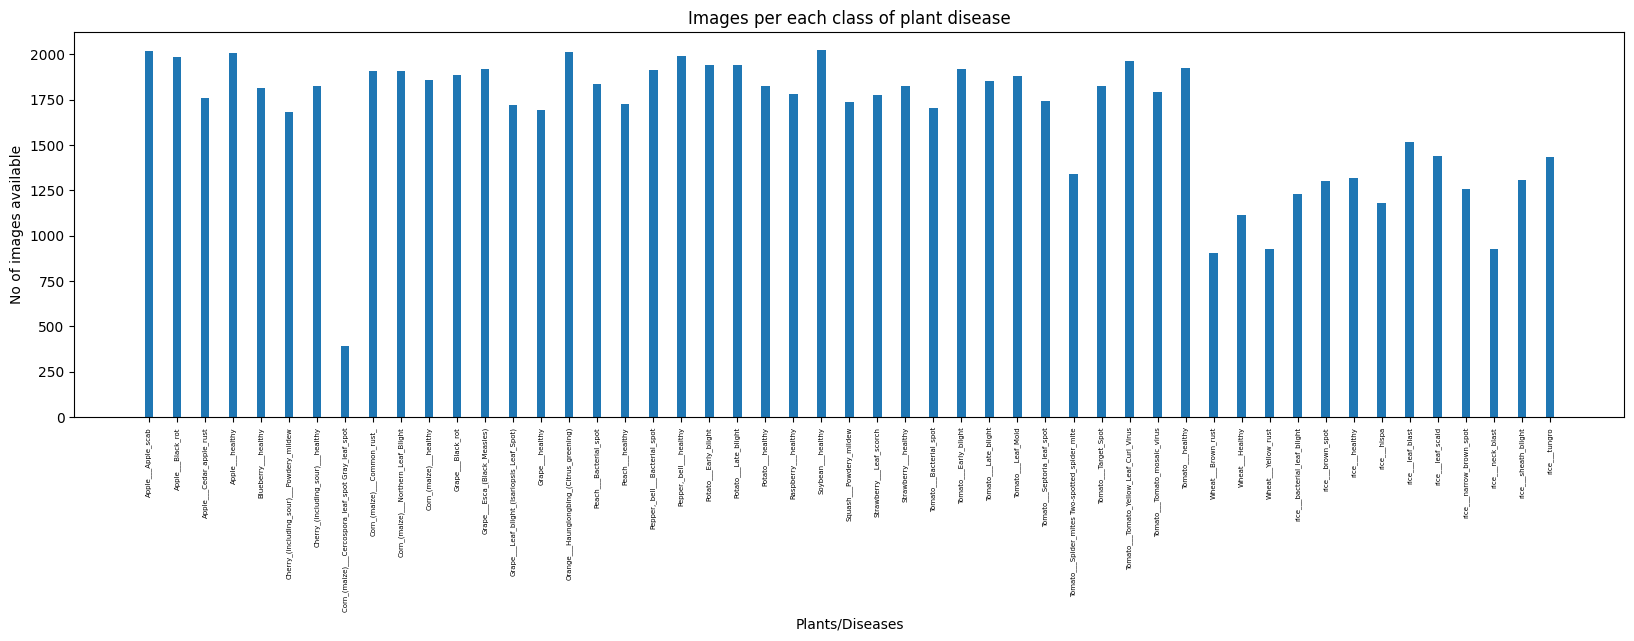

In [12]:
# plotting number of images available for each disease
index = [n for n in range(51)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, training_set.class_names, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [14]:
print("total disease class: {}".format(len(training_set.class_names)))

total disease class: 51


Total classes: 51


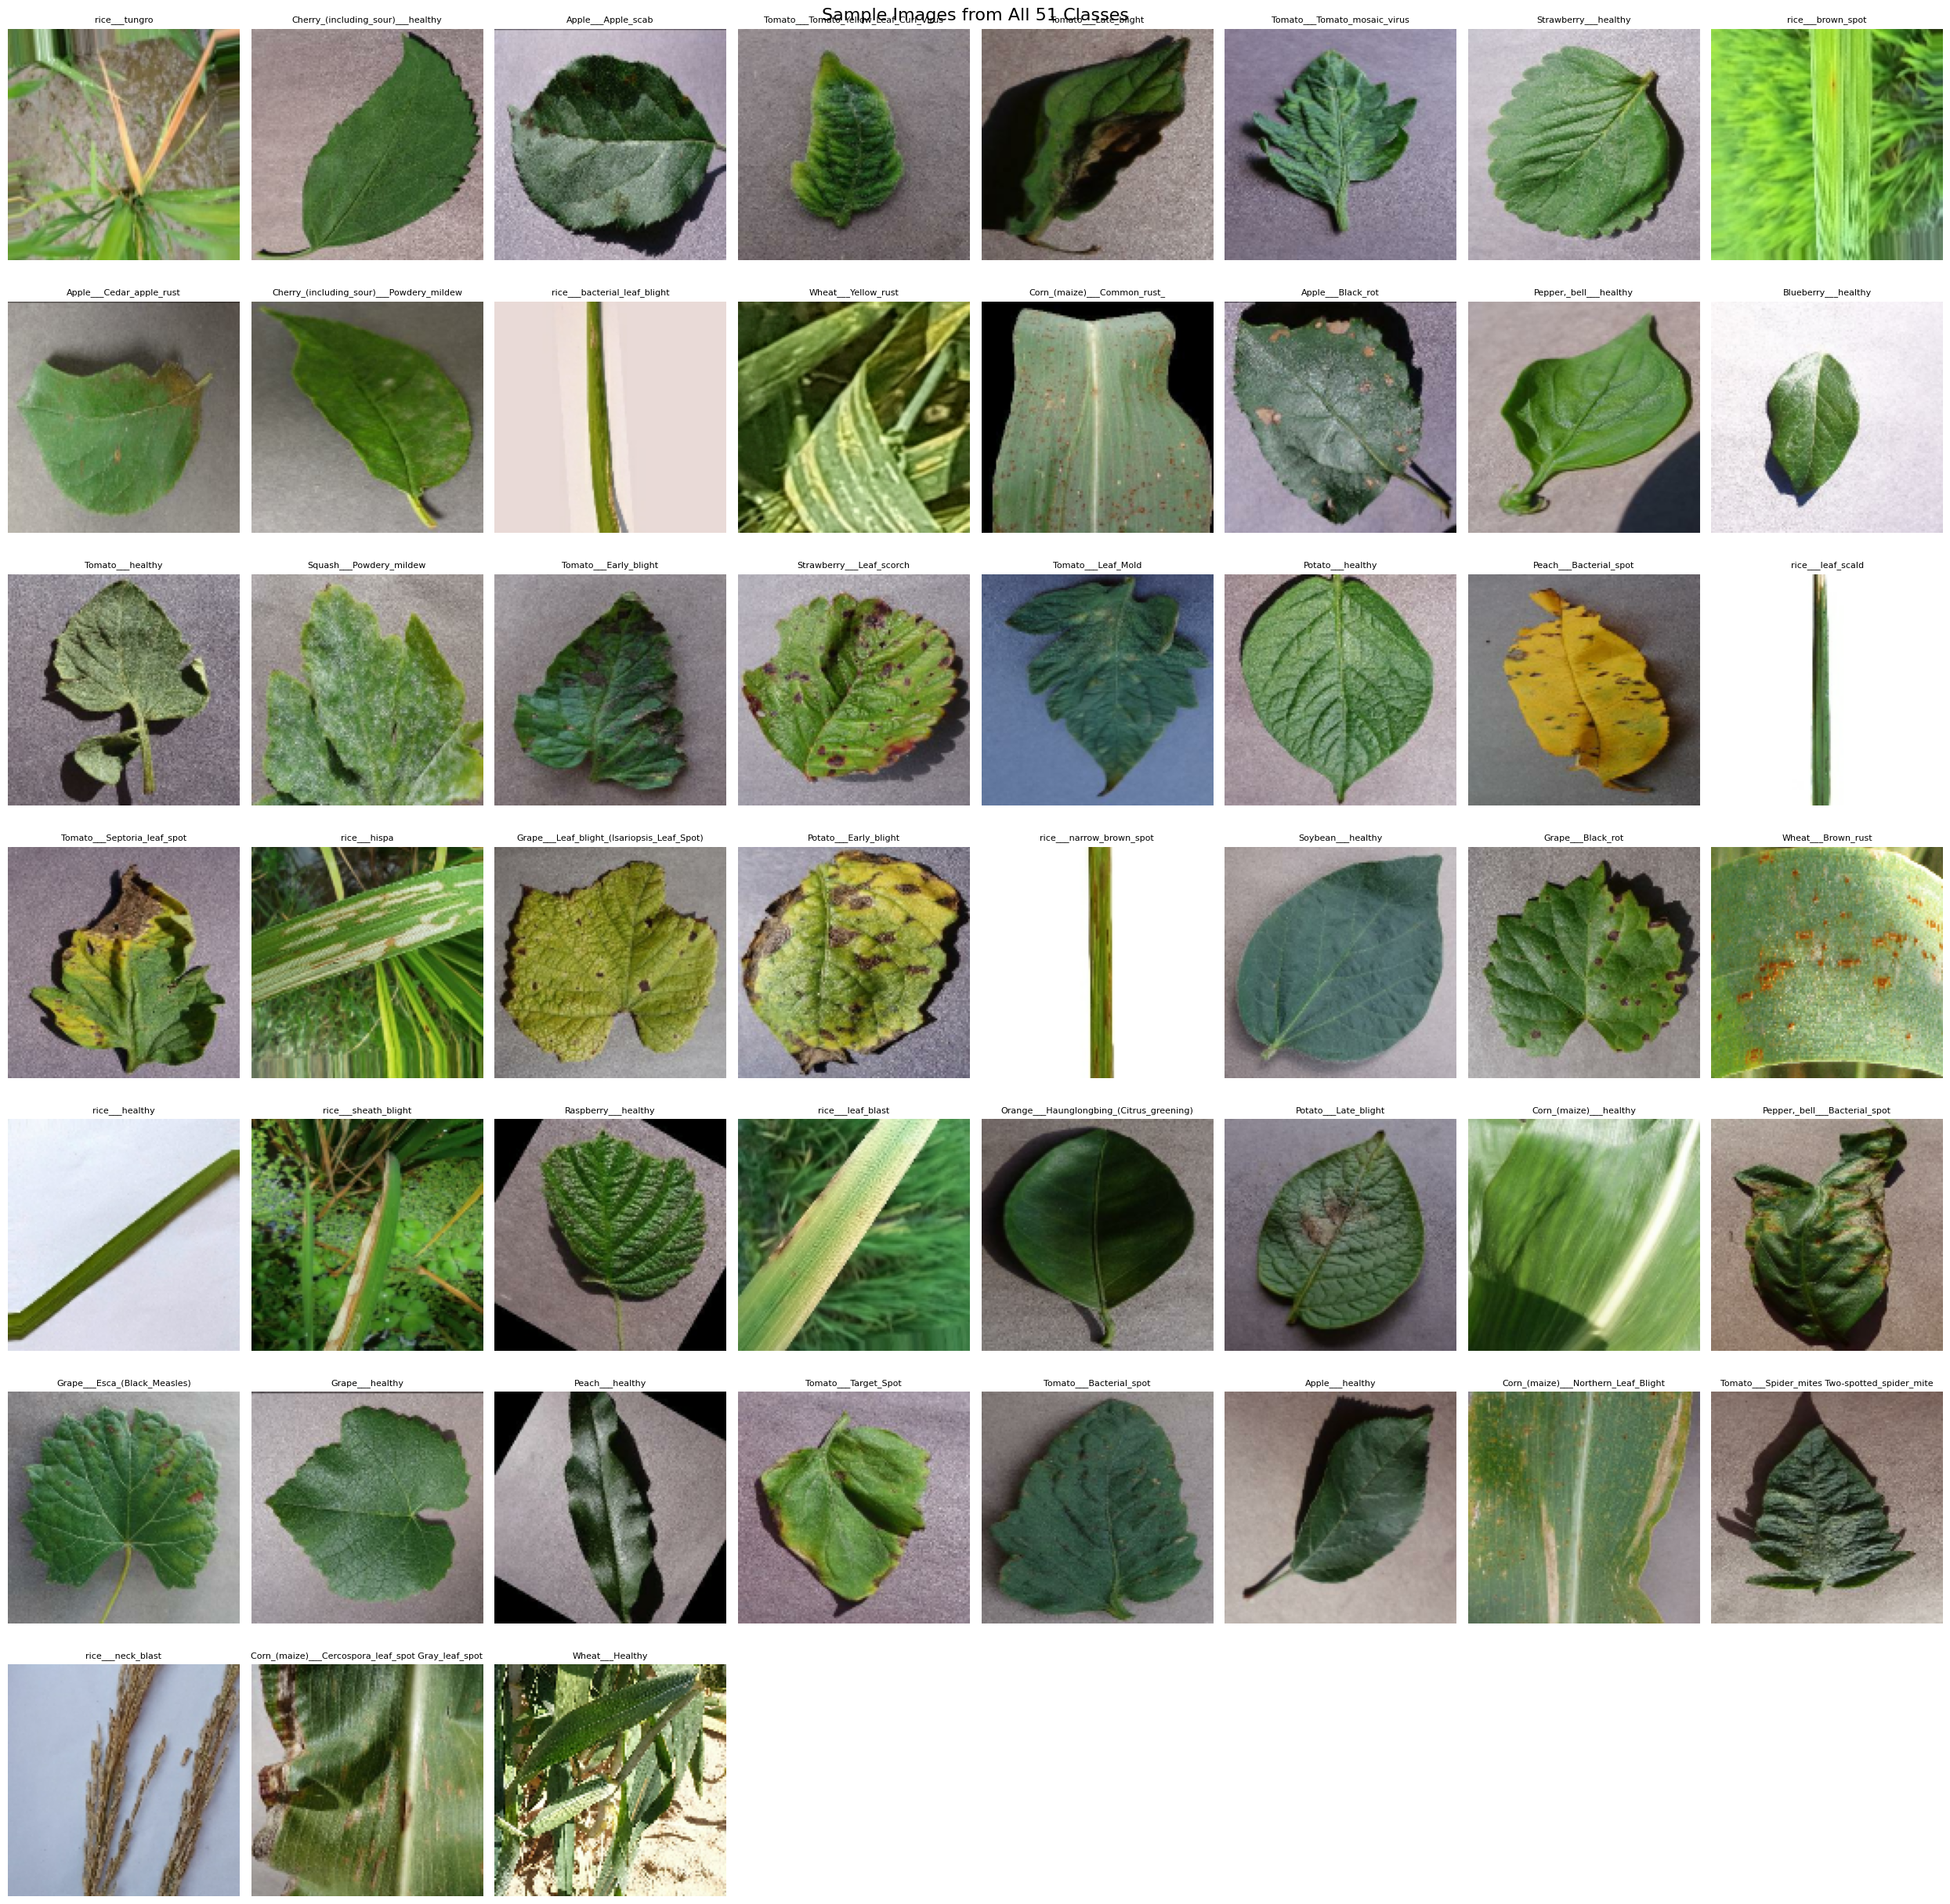

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Get class names from dataset
class_names = training_set.class_names
print(f"Total classes: {len(class_names)}")

# Create a dictionary to store one sample per class
samples = {}
for images, labels in training_set:
    for img, label in zip(images, labels):
        class_idx = tf.argmax(label).numpy()
        class_name = class_names[class_idx]
        if class_name not in samples:
            samples[class_name] = img.numpy().astype("uint8")
        # Stop once we have one sample per class
        if len(samples) == len(class_names):
            break
    if len(samples) == len(class_names):
        break

# Plot all 51 classes
plt.figure(figsize=(25, 25))
for i, (class_name, img) in enumerate(samples.items()):
    ax = plt.subplot(7, 8, i + 1)  # 7 rows x 8 cols (adjust for 51)
    plt.imshow(img)
    plt.title(class_name, fontsize=8)
    plt.axis("off")

plt.suptitle("Sample Images from All 51 Classes", fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 51), dtype=tf.float32, name=None))>

In [17]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[184.5      182.5      183.5     ]
   [180.25     178.25     179.25    ]
   [180.75     178.75     179.75    ]
   ...
   [205.75     203.75     204.75    ]
   [205.25     203.25     204.25    ]
   [208.5      206.5      207.5     ]]

  [[186.25     184.25     185.25    ]
   [186.25     184.25     185.25    ]
   [187.75     185.75     186.75    ]
   ...
   [205.5      203.5      204.5     ]
   [207.       205.       206.      ]
   [210.5      208.5      209.5     ]]

  [[186.75     184.75     185.75    ]
   [192.25     190.25     191.25    ]
   [192.25     190.25     191.25    ]
   ...
   [206.       204.       205.      ]
   [207.5      205.5      206.5     ]
   [209.25     207.25     208.25    ]]

  ...

  [[117.       112.       109.      ]
   [130.5      125.5      122.5     ]
   [124.5      119.5      116.5     ]
   ...
   [143.5      137.5      139.5     ]
   [139.       133.       135.      ]
   [140.75     134.75     136.75    ]]

  [[132.5      127.5      124.5   

In [18]:
# Building Model

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

# print("GPUs detected:", tf.config.list_physical_devices('GPU'))

# if tf.config.list_physical_devices('GPU'):
#     print("✅ TensorFlow will use GPU automatically!")
# else:
#     print("⚠️ No GPU detected, running on CPU.")

In [19]:
model = Sequential()

In [20]:
# Building Convolution Layer

In [21]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [23]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(units=1500,activation='relu'))

In [29]:
model.add(Dropout(0.4))

In [30]:
#Output Layer
model.add(Dense(units=51,activation='softmax'))

In [31]:
from tensorflow.keras.optimizers import Adam  # Use this instead of legacy.Adam

optimizer = Adam(learning_rate=0.001)


In [99]:
# Compiling Model

In [100]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [101]:
# model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#     learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 51)             │        76,551 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,862,275 (29.99 MB)

 Trainable params: 7,862,275 (29.99 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


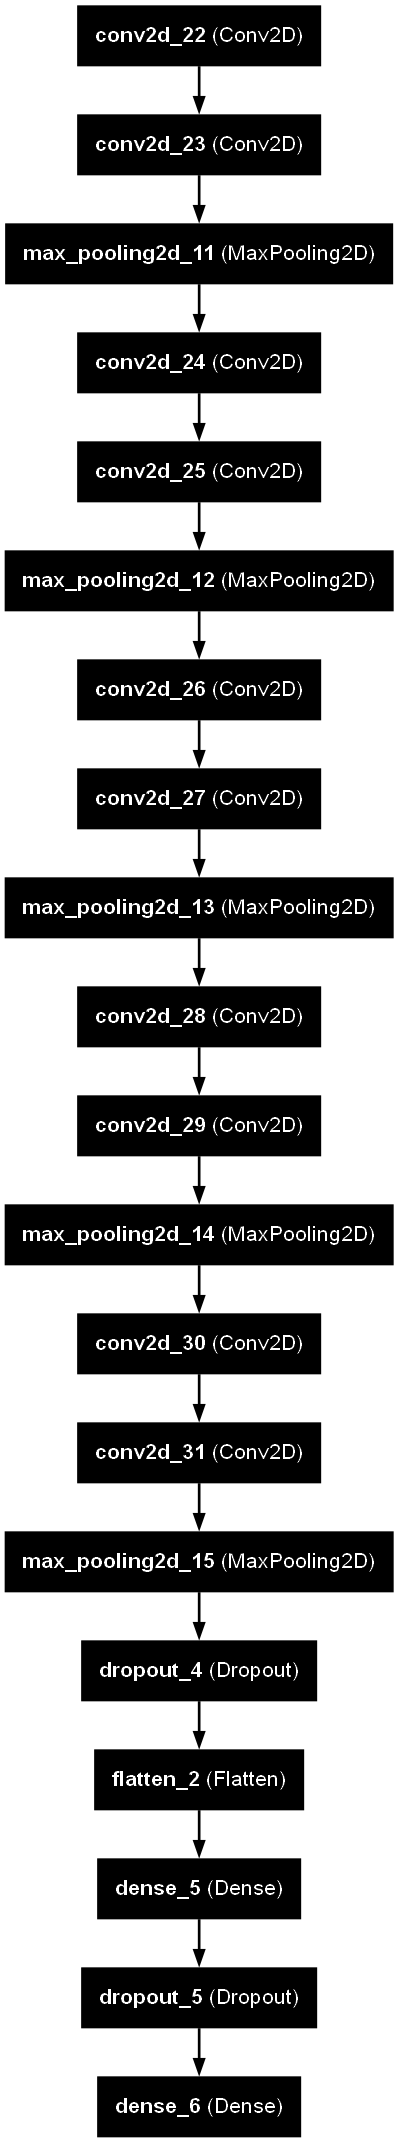

In [103]:
#visualizing the model
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

In [104]:
# Model Training

In [105]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10,)

Epoch 1/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 2551s 965ms/step - accuracy: 0.5923 - loss: 1.4205 - val_accuracy: 0.8095 - val_loss: 0.6208
Epoch 2/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1392s 527ms/step - accuracy: 0.8427 - loss: 0.4969 - val_accuracy: 0.8996 - val_loss: 0.3131
Epoch 3/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1422s 538ms/step - accuracy: 0.9001 - loss: 0.3057 - val_accuracy: 0.9113 - val_loss: 0.2765
Epoch 4/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1490s 564ms/step - accuracy: 0.9259 - loss: 0.2212 - val_accuracy: 0.9263 - val_loss: 0.2300
Epoch 5/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 2232s 845ms/step - accuracy: 0.9439 - loss: 0.1710 - val_accuracy: 0.9373 - val_loss: 0.1942
Epoch 6/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1624s 615ms/step - accuracy: 0.9556 - loss: 0.1333 - val_accuracy: 0.9518 - val_loss: 0.1537
Epoch 7/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1407s 533ms/step - accuracy: 0.9629 - loss: 0.1126 - val_accuracy: 0.9534 - val_loss: 0.1483
Epoch 8/10
2641/2641 ━━━━━━━━━━━━━━━━━━━━ 1376s 521ms/s

In [106]:
# model.save("trained_Model.keras")

In [107]:
# Model Evaluation

In [108]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2641/2641 ━━━━━━━━━━━━━━━━━━━━ 486s 184ms/step - accuracy: 0.9796 - loss: 0.0590


In [109]:
print(train_loss,train_acc)

0.05897150933742523 0.9796189069747925


In [110]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

647/647 ━━━━━━━━━━━━━━━━━━━━ 130s 201ms/step - accuracy: 0.9472 - loss: 0.1794


In [111]:
print(val_loss,val_acc)

0.17943626642227173 0.9471800327301025


In [112]:
model.save("plant_disease_model.keras")

In [113]:
model.save("plant_disease_model.h5")

In [114]:
training_history.history

{'accuracy': [0.5922712683677673,
  0.8427388072013855,
  0.9001302123069763,
  0.9258610606193542,
  0.9438513517379761,
  0.9556397199630737,
  0.9629305005073547,
  0.9683157801628113,
  0.9735590219497681,
  0.9762457013130188],
 'loss': [1.4205461740493774,
  0.4969027042388916,
  0.3056979179382324,
  0.22121238708496094,
  0.17102450132369995,
  0.1332683265209198,
  0.11256092041730881,
  0.09355667233467102,
  0.07974864542484283,
  0.07194633036851883],
 'val_accuracy': [0.8095192313194275,
  0.8996323943138123,
  0.9112895131111145,
  0.9262841939926147,
  0.9373125433921814,
  0.9518235325813293,
  0.9533714056015015,
  0.9598045945167542,
  0.9532262682914734,
  0.9471800327301025],
 'val_loss': [0.6207628846168518,
  0.31307411193847656,
  0.2764621376991272,
  0.2300291657447815,
  0.19416552782058716,
  0.15365760028362274,
  0.14831915497779846,
  0.13420848548412323,
  0.14958283305168152,
  0.1794363260269165]}

In [115]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [116]:
training_history.history['val_accuracy']

[0.8095192313194275,
 0.8996323943138123,
 0.9112895131111145,
 0.9262841939926147,
 0.9373125433921814,
 0.9518235325813293,
 0.9533714056015015,
 0.9598045945167542,
 0.9532262682914734,
 0.9471800327301025]

In [117]:
# Accuracy Visualization

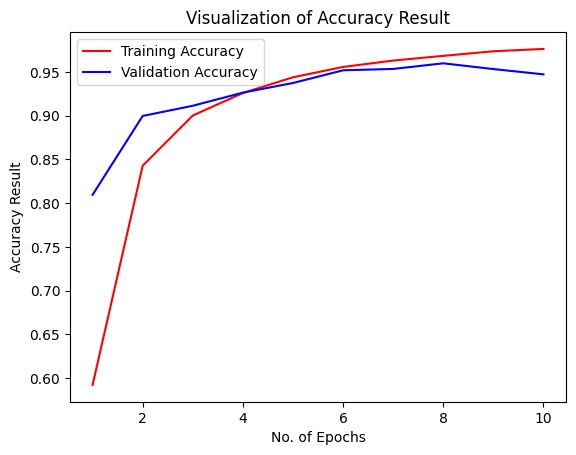

In [118]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [127]:
# Some other metrics for model evaluation

In [128]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [129]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Datasets/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 20674 files belonging to 51 classes.


In [130]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

647/647 ━━━━━━━━━━━━━━━━━━━━ 107s 165ms/step


(array([[9.9994171e-01, 1.4036490e-09, 9.8122344e-10, ..., 2.7805037e-14,
         8.4883747e-15, 2.8247980e-13],
        [9.9992692e-01, 4.3227924e-10, 6.2168764e-12, ..., 2.4211669e-16,
         6.0920422e-15, 6.9767888e-14],
        [1.0000000e+00, 9.9868317e-12, 4.2605745e-11, ..., 3.6202074e-19,
         9.8170904e-18, 3.2734376e-15],
        ...,
        [3.8685214e-13, 6.9997659e-13, 1.0936878e-09, ..., 1.2040915e-10,
         3.2648153e-04, 9.9966669e-01],
        [9.1659957e-10, 1.1276899e-10, 2.7798945e-08, ..., 7.2933010e-10,
         1.5467641e-07, 9.9614501e-01],
        [3.8178072e-11, 6.3910289e-14, 8.3625586e-11, ..., 1.0549384e-11,
         8.7906255e-06, 9.9998677e-01]], dtype=float32),
 (20674, 51))

In [131]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [132]:
predicted_categories

<tf.Tensor: shape=(20674,), dtype=int64, numpy=array([ 0,  0,  0, ..., 50, 50, 50], dtype=int64)>

In [133]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(20674, 51), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [134]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(20674,), dtype=int64, numpy=array([ 0,  0,  0, ..., 50, 50, 50], dtype=int64)>

In [135]:
# pip install scikit-learn


In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.88      0.92       504
                                 Apple___Black_rot       1.00      0.95      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.88      0.99      0.93       502
                               Blueberry___healthy       0.97      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.98      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.68      0.87      0.76       112
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.89      0.

In [138]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[442,   0,   0, ...,   0,   0,   0],
       [  3, 474,   0, ...,   0,   0,   0],
       [  0,   0, 429, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 196,   0,   0],
       [  0,   0,   0, ...,   0, 259,   0],
       [  0,   0,   0, ...,   0,  12, 289]], dtype=int64)

In [139]:
### Confusion Matrix Visualization

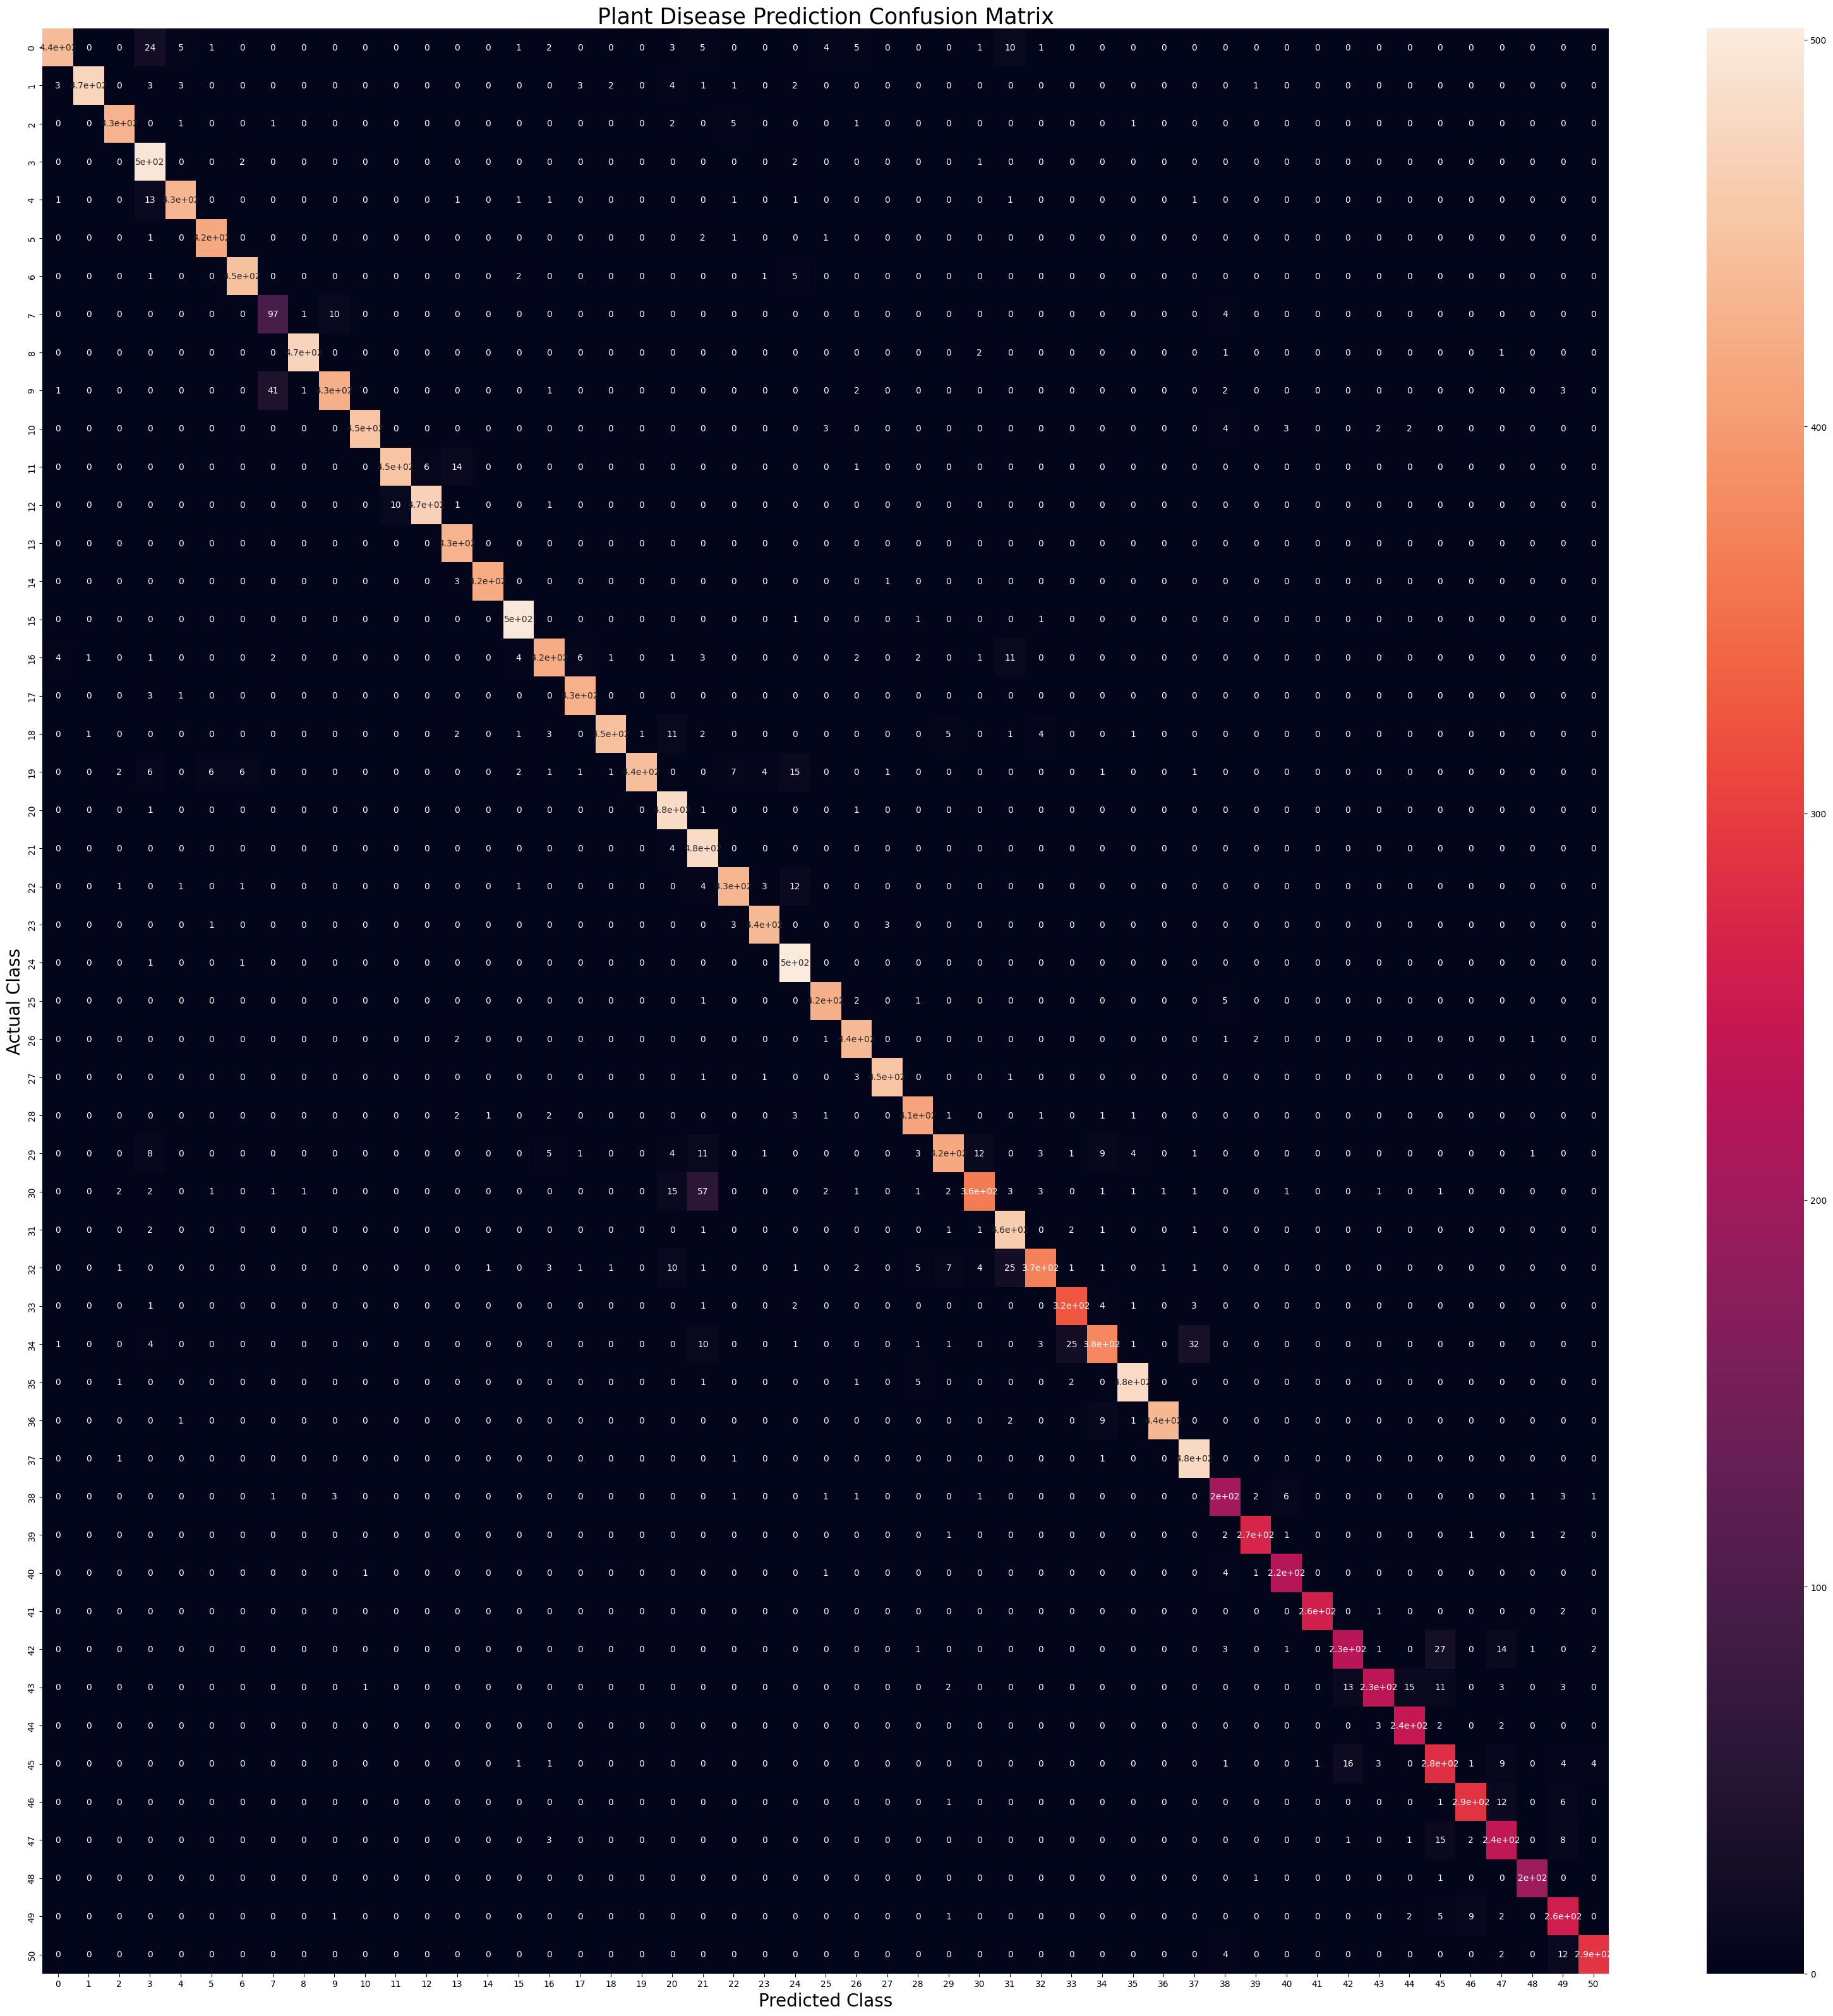

In [140]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()